# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.
num_duplicates = df.duplicated().sum()
num_duplicates


720

In [4]:
#  2. Modify our df to have all duplicate rows removed. 
print(df.shape)

(11914, 15)


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print(df.shape)


(11194, 15)


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?
null_counts = df.isnull().sum()
null_counts

print("Column 'Engine HP' has the most null values with 69 null values.")

Column 'Engine HP' has the most null values with 69 null values.


In [8]:
# * Print how long our dataframe is.
print("The dataframe has {num} rows.".format(num = len(df)))


The dataframe has 11194 rows.


In [9]:
# * Remove any row that has a null value in it. 
df.dropna(inplace=True)


In [10]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

print("The dataframe has {num} rows.".format(num = len(df)))

The dataframe has 11092 rows.


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<Axes: title={'center': 'Count of Each Car Brand'}, xlabel='Car Brand', ylabel='Count'>

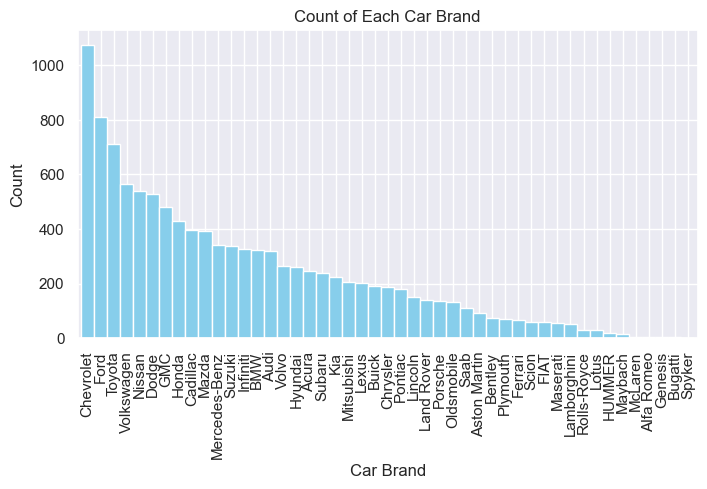

In [11]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
brand_counts = df['Make'].value_counts()

brand_counts.plot(kind = 'bar', title = 'Count of Each Car Brand',
                 xlabel = 'Car Brand', ylabel = 'Count',
                 color = 'skyblue', width = 1,
                 figsize = (8, 4))


# plt.figure(figsize=(10,8))
# plt.bar(brands, brand_counts, color ='skyblue', width = 1)
# plt.title('Count of Each Car Brand ')
# plt.xlabel('Car Brand')
# plt.ylabel('Count')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<Axes: title={'center': 'Count of Each Car Brand'}, xlabel='Car Brand', ylabel='Count'>

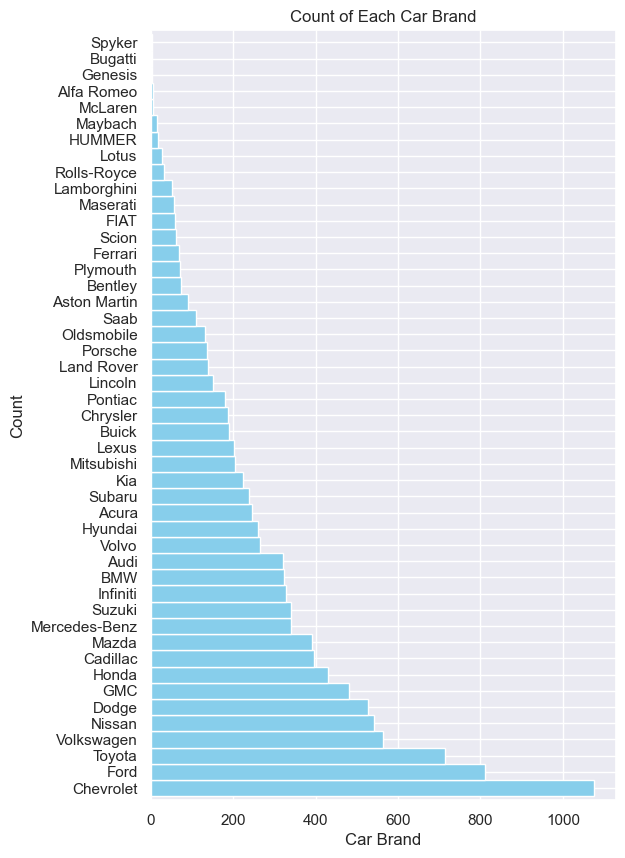

In [12]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

brand_counts.plot(kind = 'barh', title = 'Count of Each Car Brand',
                 xlabel = 'Car Brand', ylabel = 'Count',
                 color = 'skyblue', width = 1,
                 figsize = (6, 10))

# plt.barh(brands, brand_counts, height = 1)
# plt.title('Count of Each Car Brand ')
# plt.xlabel('Count')
# plt.ylabel('Car Brand')
# plt.figure(figsize=(5,100))
# plt.show


# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


In [13]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
year_gb = df.groupby('Year')
year_gb.first()

,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Year,,,,,,,,,,,,,,
1990,Audi,200,regular unleaded,162.0,5.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,20,16,3105,2000
1991,Mercedes-Benz,190-Class,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,4.0,Compact,Sedan,26,18,617,2000
1992,Audi,100,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
1993,Audi,100,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000
1994,Audi,100,regular unleaded,172.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Wagon,21,16,3105,2000
1995,Nissan,300ZX,regular unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,22,16,2009,3049
1996,Nissan,200SX,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,36,26,2009,2000
1997,Nissan,200SX,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,29,21,2009,2000
1998,Nissan,200SX,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,35,25,2009,2000


In [14]:
mean_msrp = year_gb['MSRP'].mean()
mean_msrp

Year
1990     2032.272727
1991     2120.196078
1992     2108.346457
1993     2211.496855
1994     2349.328125
1995     2647.206897
1996     2566.565217
1997     3164.644578
1998     3036.151724
1999     3153.850877
2000     3197.104348
2001    41500.666667
2002    33744.156098
2003    39774.063025
2004    36333.306034
2005    37029.951691
2006    32074.850515
2007    35278.404192
2008    56753.838509
2009    50876.837079
2010    52418.782609
2011    58060.146953
2012    61993.874286
2013    50770.798137
2014    65710.961397
2015    47506.750244
2016    47799.916098
2017    42224.902804
Name: MSRP, dtype: float64

<Axes: title={'center': 'Year vs. Mean MSRP'}, xlabel='Year', ylabel='Mean MSRP'>

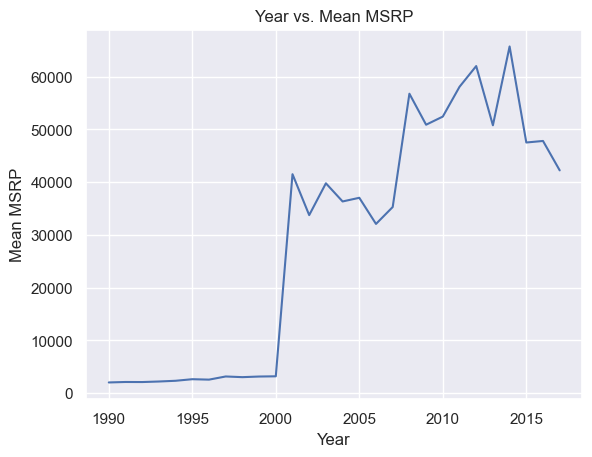

In [15]:
mean_msrp.plot(kind='line', ylabel='Mean MSRP', title='Year vs. Mean MSRP')

# It seems as though in the years before (and including) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [16]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = np.where(df['Year'] <= 2000, 10, 1)

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = df['adjusted_price'] * df['MSRP']

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

In [17]:
# Plot new prices
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
year2_gb = df.groupby('Year')
year2_gb.first()


,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
Year,,,,,,,,,,,,,,,
1990,Audi,200,regular unleaded,162.0,5.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,20,16,3105,2000,20000
1991,Mercedes-Benz,190-Class,regular unleaded,130.0,4.0,MANUAL,rear wheel drive,4.0,Compact,Sedan,26,18,617,2000,20000
1992,Audi,100,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
1993,Audi,100,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
1994,Audi,100,regular unleaded,172.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Wagon,21,16,3105,2000,20000
1995,Nissan,300ZX,regular unleaded,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,22,16,2009,3049,30490
1996,Nissan,200SX,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,36,26,2009,2000,20000
1997,Nissan,200SX,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,29,21,2009,2000,20000
1998,Nissan,200SX,regular unleaded,115.0,4.0,MANUAL,front wheel drive,2.0,Compact,Coupe,35,25,2009,2000,20000


In [18]:
adjusted_mean_msrp = year2_gb['adjusted_price'].mean()
adjusted_mean_msrp

Year
1990    20322.727273
1991    21201.960784
1992    21083.464567
1993    22114.968553
1994    23493.281250
1995    26472.068966
1996    25665.652174
1997    31646.445783
1998    30361.517241
1999    31538.508772
2000    31971.043478
2001    41500.666667
2002    33744.156098
2003    39774.063025
2004    36333.306034
2005    37029.951691
2006    32074.850515
2007    35278.404192
2008    56753.838509
2009    50876.837079
2010    52418.782609
2011    58060.146953
2012    61993.874286
2013    50770.798137
2014    65710.961397
2015    47506.750244
2016    47799.916098
2017    42224.902804
Name: adjusted_price, dtype: float64

<Axes: title={'center': 'Year vs. Adjusted Mean MSRP'}, xlabel='Year', ylabel='Adjusted Mean MSRP'>

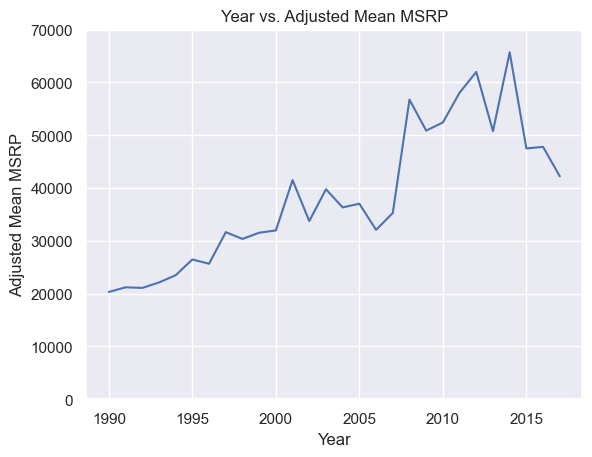

In [19]:
adjusted_mean_msrp.plot(kind='line', ylabel='Adjusted Mean MSRP', title='Year vs. Adjusted Mean MSRP', ylim=(0,70000))

# Plot the relationship between Engine HP and highway MPG

[Text(0.5, 1.0, 'Engine HP vs. Highway MPG')]

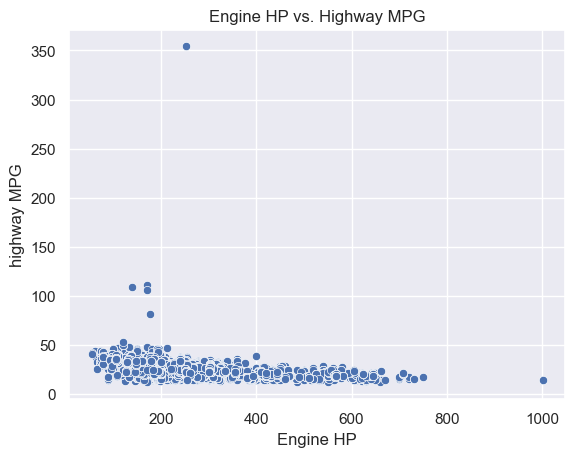

In [20]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data=df, x='Engine HP', y='highway MPG').set(title='Engine HP vs. Highway MPG')

# plt.scatter(x=df['Engine HP'], y=df['highway MPG'])
# plt.xlabel('Engine HP')
# plt.ylabel('Highway MPG') 
# plt.title('Engine HP vs. Highway MPG')

In [21]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
no_outlier_df = df[(df['highway MPG']<80) & (df['Engine HP']<800)]

# Replot the relationship between Engine HP and highway MPG


[Text(0.5, 1.0, 'Engine HP vs. Highway MPG')]

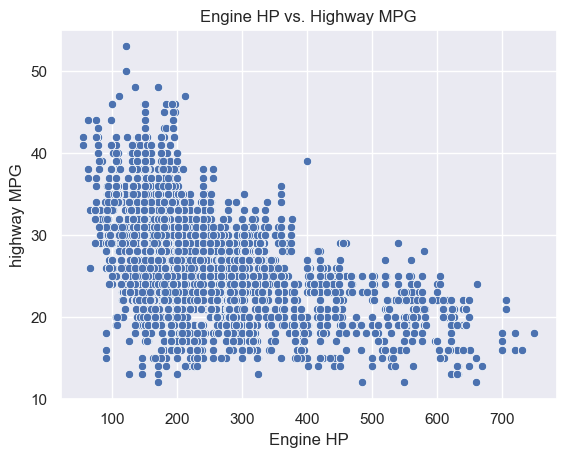

In [22]:
# Re-Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data=no_outlier_df, x='Engine HP', y='highway MPG').set(title='Engine HP vs. Highway MPG')


# Make a scatter plot of Engine HP vs highway MPG

[Text(0.5, 1.0, 'Engine HP vs. Highway MPG')]

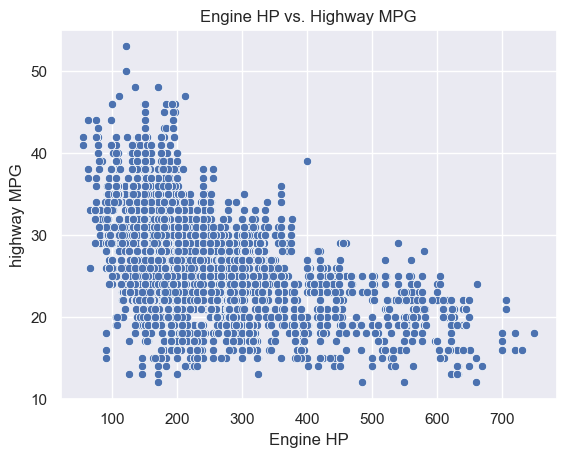

In [23]:
# Make a scatter plot of Engine HP vs highway MPG
sns.scatterplot(data=no_outlier_df, x='Engine HP', y='highway MPG').set(title='Engine HP vs. Highway MPG')


# What does this plot tell you about how Engine HP affects highway MPG?

In [24]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('It seems there is a negative correlation between engine HP and highway MPG which means the higher highway MPG tend to be engine hp may be lower. This scatterplot only shows correlation and not causation, so we cannot imply that one causes and change to the other.')

It seems there is a negative correlation between engine HP and highway MPG which means the higher highway MPG tend to be engine hp may be lower. This scatterplot only shows correlation and not causation, so we cannot imply that one causes and change to the other.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

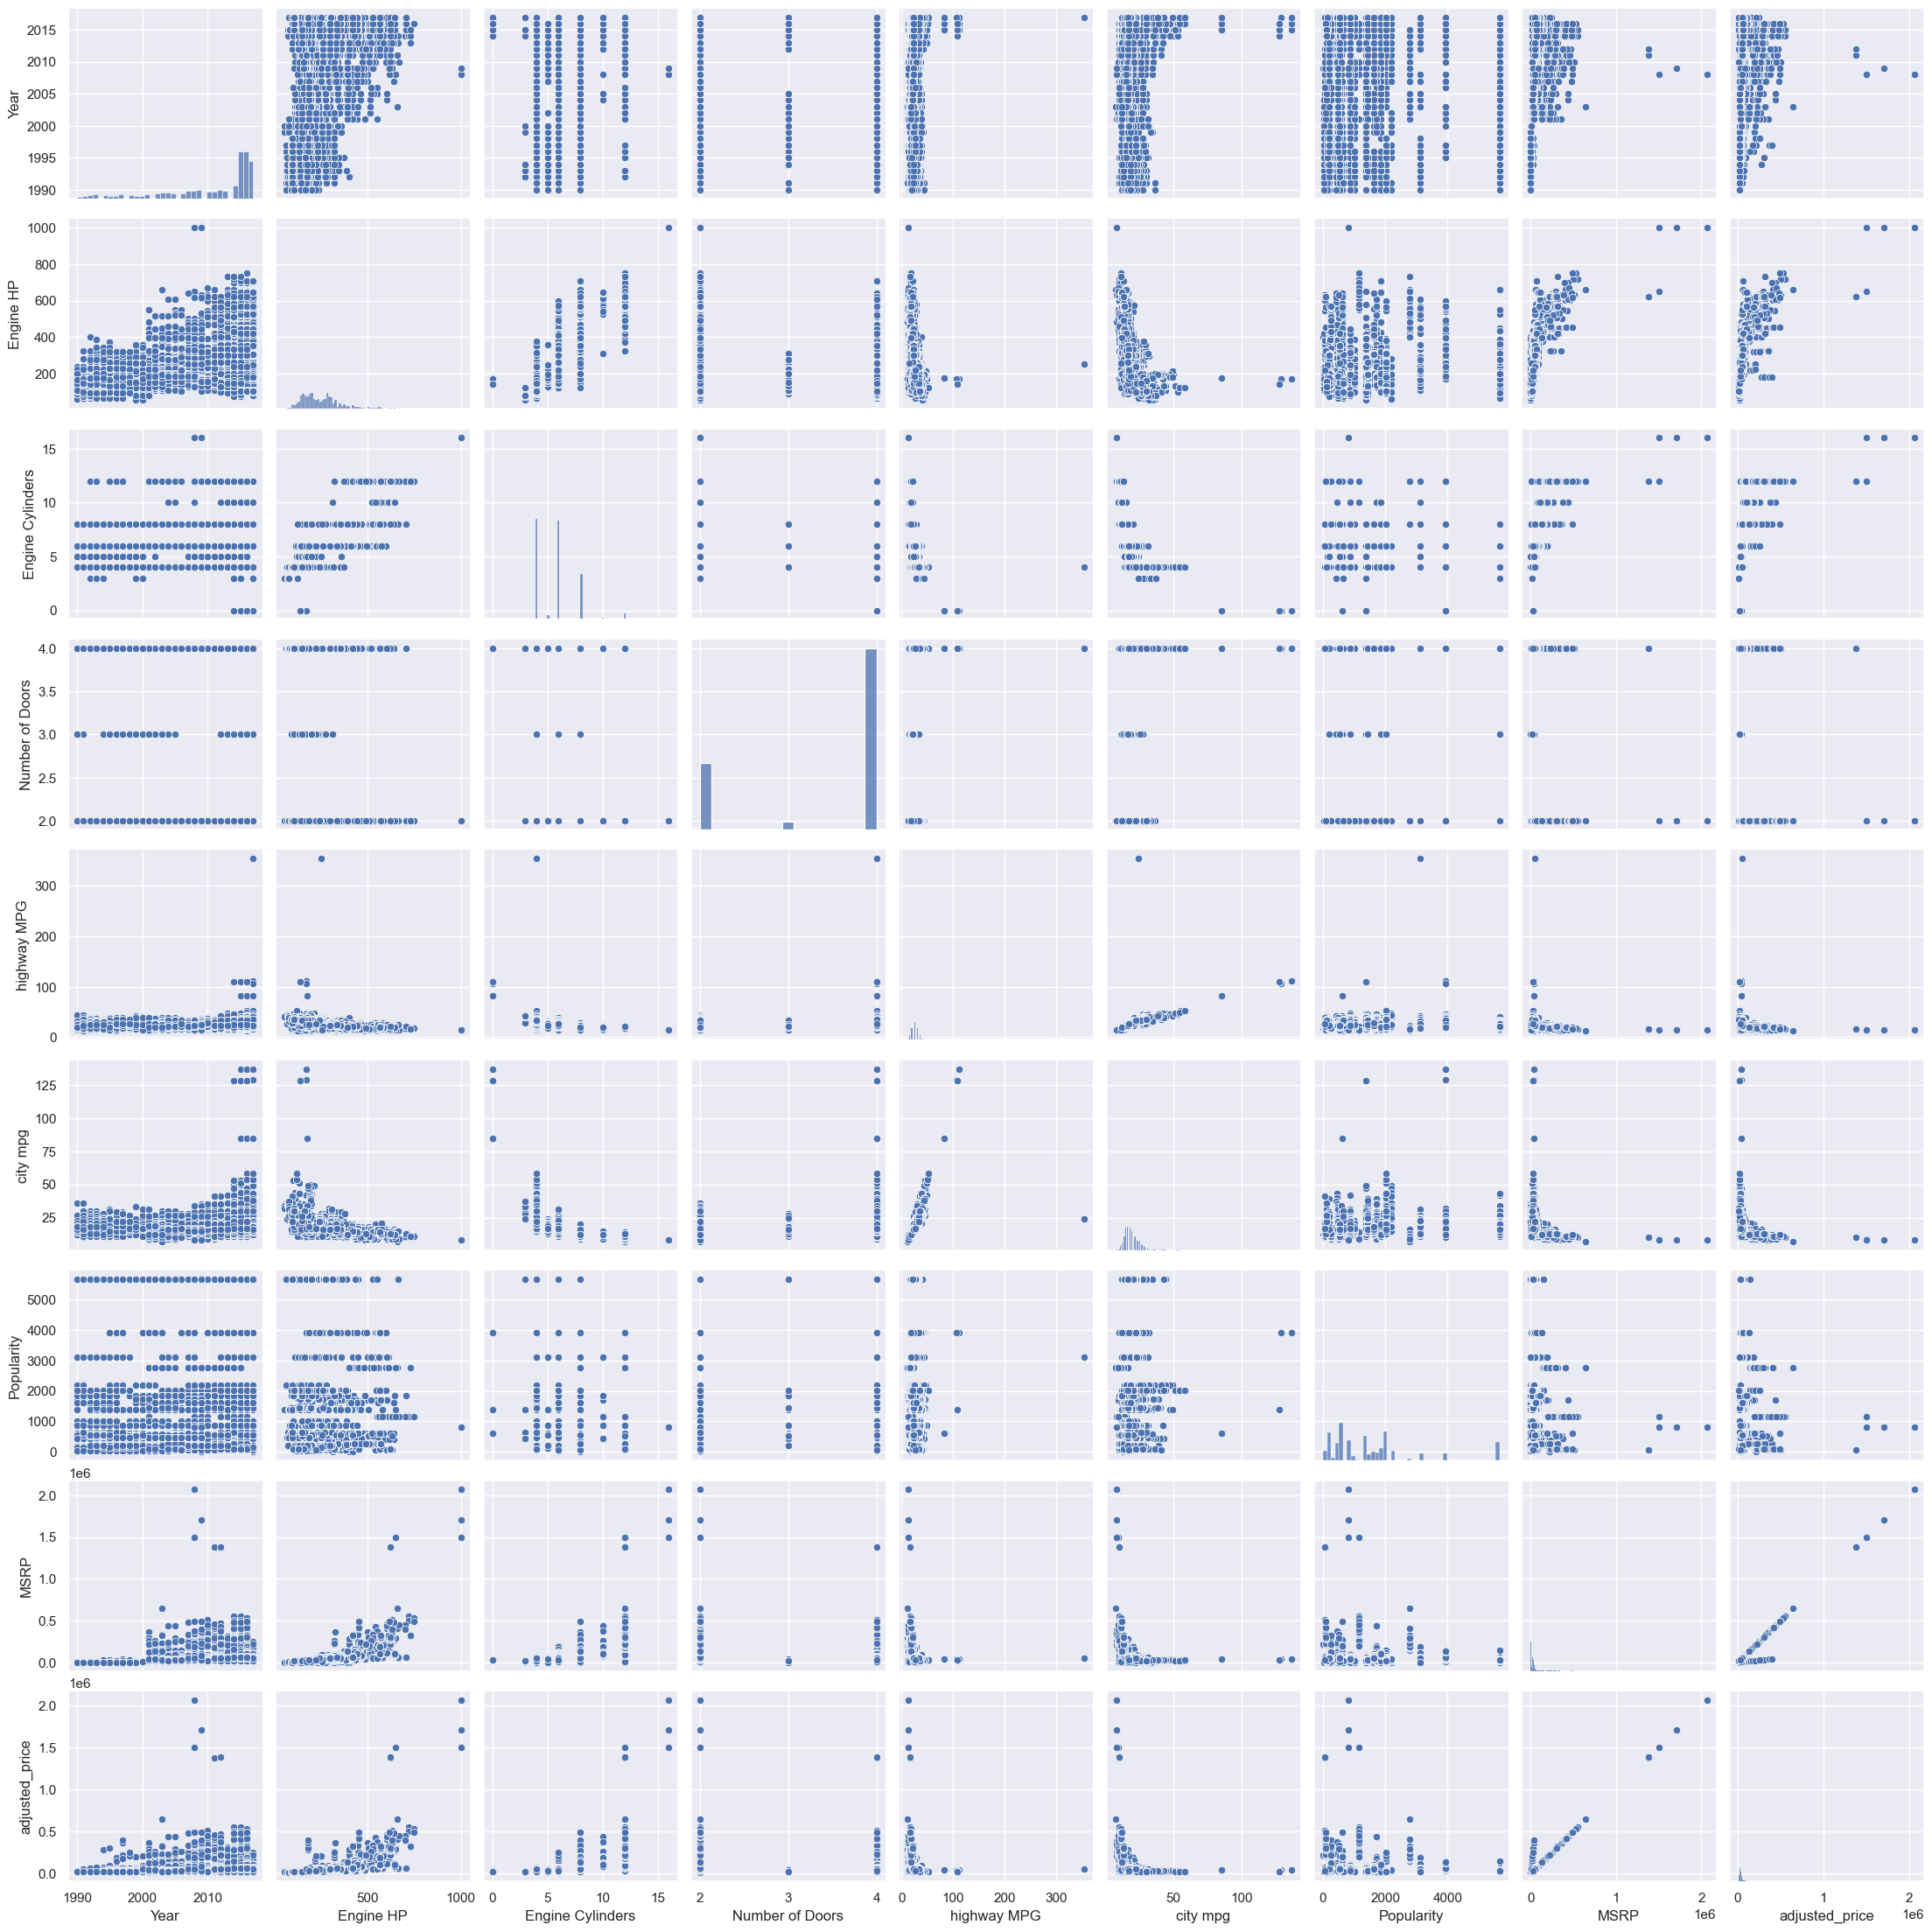

In [25]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)


In [26]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('Variables that look like they have the strongest linear relationships are highway MPG and city MPG, and engine cylinders and engine HP.')


Variables that look like they have the strongest linear relationships are highway MPG and city MPG, and engine cylinders and engine HP.


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

C:\Users\kaguy\AppData\Local\Temp\ipykernel_14924\2739278670.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


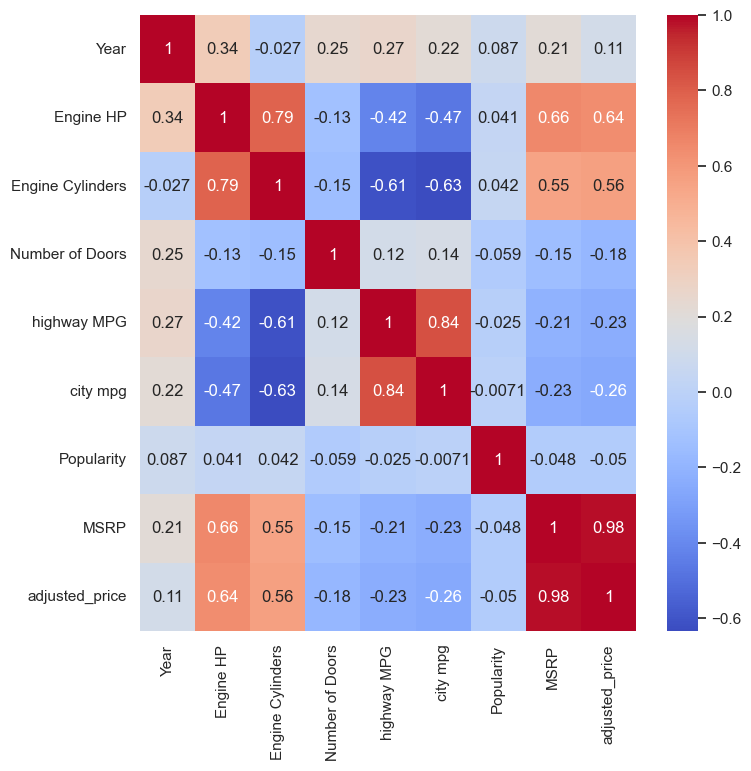

In [27]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm');

In [28]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the stronger relationship with Engine cylinders. This may be because the both are relating to engine stats. If the engine cylinder is longer, maybe it can store more and generate more HP.')

Engine HP has the stronger relationship with Engine cylinders. This may be because the both are relating to engine stats. If the engine cylinder is longer, maybe it can store more and generate more HP.


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




In [29]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Vehicle_Size', 'Vehicle_Style', 'highway_MPG',
       'city_mpg', 'Popularity', 'MSRP', 'adjusted_price'],
      dtype='object')

In [30]:
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'adjusted_price'],
      dtype='object')